In [61]:
import pandas as pd
import joblib
import os

In [60]:
!ls -lht *.csv

-rw-r--r-- 1 root root 30K Sep  7 16:22 reduced_rfe.csv
-rw-r--r-- 1 root root 36K Sep  7 15:37 heart_pca.csv
-rw-r--r-- 1 root root 35K Sep  7 15:27 scaled_heart.csv


In [62]:
unsuper_df= pd.read_csv("reduced_rfe.csv")
unsuper_df.head()

,PC1,PC2,PC3,PC4,PC5,num
0,1.056886,0.142561,-2.600496,1.342875,0.050053,0
1,-1.326260,1.587145,0.731607,0.421820,0.704721,2
2,2.536460,1.117879,0.113120,0.076922,0.263847,1
3,-1.590258,-0.653678,0.456804,1.536742,0.368943,0
4,-2.009211,0.566347,-1.179671,-0.391098,-0.499298,0


In [64]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

X_data = unsuper_df.drop(columns=["num"])  # features only

results = []

# Test cluster sizes from 2 to 8
for k in range(2, 9):
    hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hc.fit_predict(X_data)

    # Compute silhouette score
    score = silhouette_score(X_data, labels)
    results.append((k, score))
    print(f"Clusters: {k}, Silhouette Score: {score:.4f}")

# Convert results to DataFrame for easy viewing
cluster_eval_df = pd.DataFrame(results, columns=["n_clusters", "Silhouette_Score"])
print(cluster_eval_df)

Clusters: 2, Silhouette Score: 0.5391
Clusters: 3, Silhouette Score: 0.4510
Clusters: 4, Silhouette Score: 0.3600
Clusters: 5, Silhouette Score: 0.3842
Clusters: 6, Silhouette Score: 0.3793
Clusters: 7, Silhouette Score: 0.3726
Clusters: 8, Silhouette Score: 0.3947
   n_clusters  Silhouette_Score
0           2          0.539138
1           3          0.450957
2           4          0.360044
3           5          0.384207
4           6          0.379272
5           7          0.372561
6           8          0.394701


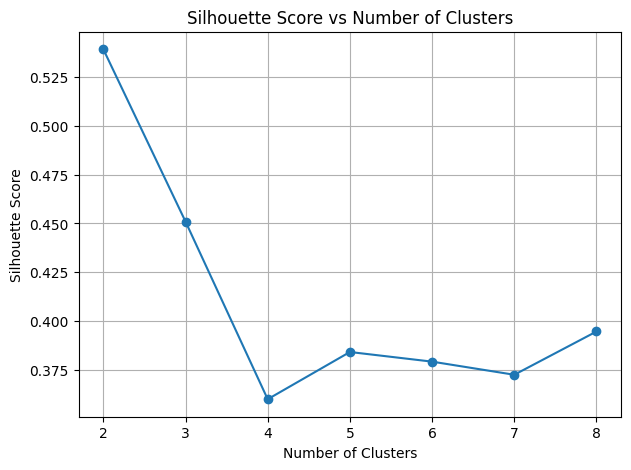

In [65]:
# Plot scores
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(cluster_eval_df["n_clusters"], cluster_eval_df["Silhouette_Score"], marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [67]:
results = []

# Test KMeans with clusters 2 to 8
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_data)

    # Silhouette score
    score = silhouette_score(X_data, labels)
    results.append((k, score))
    print(f"KMeans Clusters: {k}, Silhouette Score: {score:.4f}")

# Convert results to DataFrame for easier viewing
kmeans_eval_df = pd.DataFrame(results, columns=["n_clusters", "Silhouette_Score"])
kmeans_eval_df

KMeans Clusters: 2, Silhouette Score: 0.5391
KMeans Clusters: 3, Silhouette Score: 0.4510
KMeans Clusters: 4, Silhouette Score: 0.4043
KMeans Clusters: 5, Silhouette Score: 0.4251
KMeans Clusters: 6, Silhouette Score: 0.4224
KMeans Clusters: 7, Silhouette Score: 0.4157
KMeans Clusters: 8, Silhouette Score: 0.3983


,n_clusters,Silhouette_Score
0,2,0.539138
1,3,0.450957
2,4,0.404328
3,5,0.425111
4,6,0.422375
5,7,0.415733
6,8,0.398308


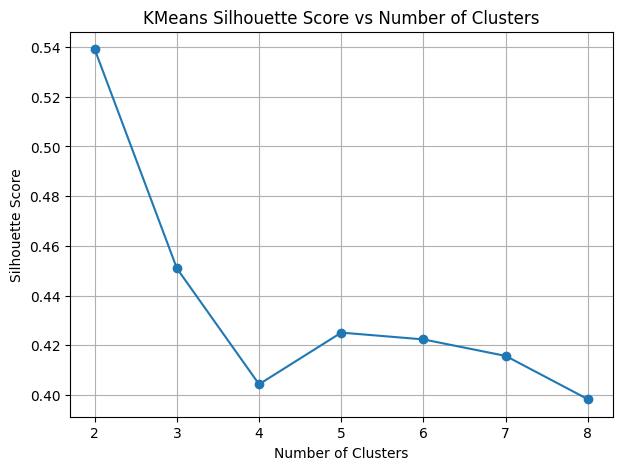

In [68]:
# Plot silhouette scores
plt.figure(figsize=(7,5))
plt.plot(kmeans_eval_df["n_clusters"], kmeans_eval_df["Silhouette_Score"], marker='o')
plt.title("KMeans Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [70]:
# Create folder if it doesn't exist
os.makedirs("models", exist_ok=True)

# Initialize best models with 2 clusters
kmeans_best = KMeans(n_clusters=2, n_init=10, random_state=42)
agglo_best = AgglomerativeClustering(n_clusters=2, linkage='ward')

# Fit models on your data
X_data = unsuper_df.drop(columns=["num"])
kmeans_best.fit(X_data)
agglo_best.fit(X_data)

# Save models
joblib.dump(kmeans_best, "models/kmeans_2clusters.pkl")
joblib.dump(agglo_best, "models/agglo_2clusters.pkl")

print("✅ Saved KMeans and Agglomerative Clustering models in 'models/' folder")

✅ Saved KMeans and Agglomerative Clustering models in 'models/' folder


In [71]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Create folder if not exists
os.makedirs("results", exist_ok=True)

# Evaluate KMeans
sil_k = silhouette_score(X_data, kmeans_best.labels_)
ch_k = calinski_harabasz_score(X_data, kmeans_best.labels_)
db_k = davies_bouldin_score(X_data, kmeans_best.labels_)

# Evaluate Agglomerative
sil_a = silhouette_score(X_data, agglo_best.labels_)
ch_a = calinski_harabasz_score(X_data, agglo_best.labels_)
db_a = davies_bouldin_score(X_data, agglo_best.labels_)

# Prepare DataFrame
cluster_metrics_df = pd.DataFrame([
    ["KMeans_2clusters", sil_k, ch_k, db_k],
    ["Agglo_2clusters", sil_a, ch_a, db_a]
], columns=["Model", "Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])

# Append to txt file
with open("results/evaluation_metrics.txt", "a") as f:
    f.write("\n\n# Clustering Evaluation Metrics\n")
    f.write(cluster_metrics_df.to_string(index=False))

print("✅ Cluster evaluation metrics appended to 'results/evaluation_metrics.txt'")

✅ Cluster evaluation metrics appended to 'results/evaluation_metrics.txt'


In [81]:
#Compare Clusters with Actual Labels
from sklearn.metrics import adjusted_rand_score, confusion_matrix

# Predict labels using the best models
kmeans_labels = kmeans_best.fit_predict(X_data)
agglo_labels = agglo_best.fit_predict(X_data)

# Adjusted Rand Index (how similar clustering is to true labels)
ari_kmeans = adjusted_rand_score(unsuper_df["num"], kmeans_labels)
ari_agglo = adjusted_rand_score(unsuper_df["num"], agglo_labels)

print("\nCluster Comparison with Actual Labels:")
print(f"KMeans ARI: {ari_kmeans:.4f}")
print(f"Agglomerative ARI: {ari_agglo:.4f}")

# Confusion matrix (just to visualize mapping with true labels)
print("\nKMeans Confusion Matrix:")
print(confusion_matrix(unsuper_df["num"], kmeans_labels))

print("\nAgglomerative Confusion Matrix:")
print(confusion_matrix(unsuper_df["num"], agglo_labels))


Cluster Comparison with Actual Labels:
KMeans ARI: 0.2129
Agglomerative ARI: 0.2129

KMeans Confusion Matrix:
[[ 34 130   0   0   0]
 [ 33  22   0   0   0]
 [ 28   8   0   0   0]
 [ 29   6   0   0   0]
 [ 11   2   0   0   0]]

Agglomerative Confusion Matrix:
[[130  34   0   0   0]
 [ 22  33   0   0   0]
 [  8  28   0   0   0]
 [  6  29   0   0   0]
 [  2  11   0   0   0]]


In [72]:
!ls -d models/

models/


In [73]:
!cat results/evaluation_metrics.txt

               Model  Accuracy  Precision   Recall       F1      AUC
Logisitic Regression  0.491803   0.401011 0.491803 0.408989 0.735441
       Decision Tree  0.540984   0.489343 0.540984 0.508525 0.675668
       Random Forest  0.459016   0.396423 0.459016 0.422945 0.726425
                 SVM  0.459016   0.375000 0.459016 0.388221 0.703522

# Clustering Evaluation Metrics
           Model  Silhouette  Calinski-Harabasz  Davies-Bouldin
KMeans_2clusters    0.539138         466.411628        0.774857
 Agglo_2clusters    0.539138         466.411628        0.774857

In [74]:
!ls -lht models/

total 1.4M
-rw-r--r-- 1 root root 8.0K Sep  7 16:43 agglo_2clusters.pkl
-rw-r--r-- 1 root root 2.3K Sep  7 16:43 kmeans_2clusters.pkl
-rw-r--r-- 1 root root  18K Sep  7 16:31 SVM.pkl
-rw-r--r-- 1 root root 1.3M Sep  7 16:31 Random_Forest.pkl
-rw-r--r-- 1 root root  18K Sep  7 16:31 Decision_Tree.pkl
-rw-r--r-- 1 root root 1.4K Sep  7 16:31 Logisitic_Regression.pkl
